In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

1.2 Identifikácia problémov, integrácia a čistenie dát

definujeme si funkcie na zistenie duplicitných záznamov, nejednotné formáty, chýbajúce hodnoty a vychýlené hodnoty

In [83]:
# read data
df_connections  = pd.read_csv("data/connections.csv", sep="\t")
df_devices      = pd.read_csv("data/devices.csv", sep="\t")
df_processes    = pd.read_csv("data/processes.csv", sep="\t")
df_profiles     = pd.read_csv("data/profiles.csv", sep="\t")

# identification of the problems:
def df_missing_values(df):
    print(f"Missing values:\n{df.isnull().sum()}")
    
def df_duplicates(df):
    print(f"Duplicates: {df.duplicated().sum()}")

def df_shape(df):
    print(f"Shape: \trows: {df.shape[0]}\n\t\tcolumns: {df.shape[1]}")
    
def df_dtypes(df):
    print(f"Data types:\n{df.dtypes}")

# all in one:
def analyze_dataframe(df, name):
    print(f"\nData set: {name}")
    print(f"Shape: \trows: {df.shape[0]}\n\t\tcolumns: {df.shape[1]}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Data types:\n{df.dtypes}")

# for removing duplicates
def remove_duplicates(df):
    initial_count = df.shape[0]
    df = df.drop_duplicates()
    final_count = df.shape[0]
    removed_count = initial_count - final_count
    print(f"Removed {removed_count} duplicate rows.")
    return df

# removing missing values
def remove_nan(df):
    initial_count = df.shape[0]
    df = df.dropna()

    final_count = df.shape[0]
    removed_count = initial_count - final_count

    print(f"Removed {removed_count} rows with missing values.")
    return df


1.2.a) aplikujeme funkcie na odstránenie duplikátov a chýbajúcich hodnôt

In [84]:
df_connections  = remove_duplicates(df_connections)
df_devices      = remove_duplicates(df_devices)
df_processes    = remove_duplicates(df_processes)
df_profiles     = remove_duplicates(df_profiles)

Removed 179 duplicate rows.
Removed 9 duplicate rows.
Removed 179 duplicate rows.
Removed 0 duplicate rows.


In [85]:
df_connections  = remove_nan(df_connections)
df_devices      = remove_nan(df_devices)
df_processes    = remove_nan(df_processes)
df_profiles     = remove_nan(df_profiles)

Removed 0 rows with missing values.
Removed 1 rows with missing values.
Removed 0 rows with missing values.
Removed 2268 rows with missing values.


In [92]:
df_connections.head()

,ts,imei,mwra,c.android.chrome,c.android.youtube,c.dogalize,c.android.gm,c.katana,c.UCMobile.intl,c.UCMobile.x86,c.raider,c.updateassist,c.android.vending
0,2018-05-05 10:00:00,863033069630348727,0.0,9.60395,12.85710,14.28416,8.18164,12.05903,51.17664,65.36801,90.61716,26.55309,94.42555
1,2018-05-05 10:01:00,359043379931766122,1.0,10.90381,13.52655,15.47703,12.35803,9.31984,52.40056,57.22735,52.52705,57.31544,75.44486
2,2018-05-05 10:02:00,359043379931766312,0.0,7.96027,13.93330,11.48817,10.58834,16.41358,24.55276,80.27819,91.63614,49.51560,93.00705
3,2018-05-05 10:03:00,8630330696303482329,0.0,7.96574,14.28029,11.68449,13.39682,14.09485,44.81360,34.26693,56.53248,4.51390,27.06048
4,2018-05-05 10:04:00,3590433799317661099,1.0,12.77276,10.43295,10.16739,12.20800,6.18137,34.43871,59.20602,79.33347,27.09736,81.58699


In [86]:
analyze_dataframe(df_connections, "connections")


Data set: connections
Shape: 	rows: 14877
		columns: 13
Missing values:
ts                   0
imei                 0
mwra                 0
c.android.chrome     0
c.android.youtube    0
c.dogalize           0
c.android.gm         0
c.katana             0
c.UCMobile.intl      0
c.UCMobile.x86       0
c.raider             0
c.updateassist       0
c.android.vending    0
dtype: int64
Duplicates: 0
Data types:
ts                    object
imei                   int64
mwra                 float64
c.android.chrome     float64
c.android.youtube    float64
c.dogalize           float64
c.android.gm         float64
c.katana             float64
c.UCMobile.intl      float64
c.UCMobile.x86       float64
c.raider             float64
c.updateassist       float64
c.android.vending    float64
dtype: object


In [93]:
df_devices.head()

,latitude,longitude,store_name,code,location,imei
0,30.35028,112.19028,Jingzhou,CN,Asia/Shanghai,359043379931766676
1,40.65995,-111.99633,Kearns,US,America/Denver,359043379931766486
2,16.05670,103.65309,Roi Et,TH,Asia/Bangkok,359043379931766536
3,-17.73648,168.31366,Port-Vila,VU,Pacific/Efate,359043379931766833
4,4.96667,10.70000,Tonga,CM,Africa/Douala,8630330696303481743


In [87]:
analyze_dataframe(df_devices, "devices")


Data set: devices
Shape: 	rows: 2867
		columns: 6
Missing values:
latitude      0
longitude     0
store_name    0
code          0
location      0
imei          0
dtype: int64
Duplicates: 0
Data types:
latitude      float64
longitude     float64
store_name     object
code           object
location       object
imei            int64
dtype: object


In [94]:
df_processes.head()

,ts,imei,mwra,p.android.externalstorage,p.system,p.android.packageinstaller,p.android.settings,p.android.chrome,p.android.gm,p.android.documentsui,...,p.olauncher,p.dogalize,p.android.gms,p.simulator,p.katana,p.inputmethod.latin,p.browser.provider,p.android.defcontainer,p.android.vending,p.google
0,2018-05-05 10:00:00,863033069630348727,0.0,12.71345,13.93596,7.37375,8.63678,7.59294,14.50294,12.49939,...,42.36961,24.39972,38.28394,39.75150,70.08727,35.39702,46.96978,94.36793,19.26230,8.71761
1,2018-05-05 10:01:00,359043379931766122,1.0,14.00354,13.66329,8.76390,8.45907,11.54816,9.23023,10.96660,...,43.50996,96.63160,35.35377,8.57826,21.30530,74.91400,28.78964,98.36045,2.67159,96.75896
2,2018-05-05 10:02:00,359043379931766312,0.0,9.12135,12.02995,15.24475,5.03619,9.25225,11.32397,8.95241,...,62.37735,72.10850,55.73124,85.87342,32.33386,55.19794,89.99140,80.51936,37.73145,89.03029
3,2018-05-05 10:03:00,8630330696303482329,0.0,10.02552,10.88392,15.14466,4.58649,7.65930,12.54341,6.13562,...,46.12254,40.36473,21.76176,0.98452,50.83786,90.78544,49.59389,51.32614,90.17701,39.10998
4,2018-05-05 10:04:00,3590433799317661099,1.0,10.18964,10.99286,8.52306,10.09407,13.85506,9.55446,7.87986,...,70.66280,51.37859,74.10500,42.63423,19.35378,47.21558,95.60708,96.18907,21.60796,33.91152


In [88]:
analyze_dataframe(df_processes, "processes")


Data set: processes
Shape: 	rows: 14877
		columns: 23
Missing values:
ts                            0
imei                          0
mwra                          0
p.android.externalstorage     0
p.system                      0
p.android.packageinstaller    0
p.android.settings            0
p.android.chrome              0
p.android.gm                  0
p.android.documentsui         0
p.process.gapps               0
p.gms.persistent              0
p.notifier                    0
p.olauncher                   0
p.dogalize                    0
p.android.gms                 0
p.simulator                   0
p.katana                      0
p.inputmethod.latin           0
p.browser.provider            0
p.android.defcontainer        0
p.android.vending             0
p.google                      0
dtype: int64
Duplicates: 0
Data types:
ts                             object
imei                            int64
mwra                          float64
p.android.externalstorage     float64
p.

In [95]:
df_profiles.head()

,mail,imei,birthdate,username,user_id,address,ssn,job,registration,current_location,company,name,latitude,longitude
2,abigail33@yahoo.com,359043379931766940,1929-07-04,burgessedward,2558,"0755 Scott Parks Apt. 877\nBowersborough, PW 0...",559-66-9181,Academic librarian,"05/17/2024, 00:00:00","-19.5608945,-175.139772","Underwood, Hughes and Alexander",Michelle Martin,-19.560894,-175.139772
9,kimberlycole@yahoo.com,3590433799317661743,1980-03-20,victoria79,1517,"4681 Donald Plaza Apt. 819\nAlyssahaven, NE 16176",792-70-7654,Sports coach,"04/03/2020, 00:00:00","40.478458,-65.656674","Smith, Smith and Wheeler",Adam Thomas,40.478458,-65.656674
17,mclayton@gmail.com,8630330696303481594,1997-12-29,laurenperry,62,"44173 Sophia Curve Apt. 292\nAllenfurt, KY 80351",730-18-9437,TEFL teacher,11 Feb 2023,"70.5156535,-84.149757",Newman Ltd,Katie Watkins,70.515653,-84.149757
30,kellyjames@gmail.com,8630330696303481982,1953-12-11,nicole80,745,"5808 Key Turnpike\nBrittanymouth, MP 38939",282-65-1993,Biomedical scientist,15 Aug 2022,"25.5423705,75.549933",Smith Group,Danny Hernandez,25.542371,75.549933
34,moralesjames@yahoo.com,3590433799317661446,1950-10-17,emilywilliams,1902,"54680 Estrada Estate\nAndreport, MA 57184",149-23-3842,Legal secretary,2019-01-14,"-51.831089,38.371928",Cruz Ltd,Elizabeth Sanchez,-51.831089,38.371928


In [89]:
analyze_dataframe(df_profiles, "profiles")


Data set: profiles
Shape: 	rows: 355
		columns: 12
Missing values:
mail                0
imei                0
birthdate           0
username            0
user_id             0
address             0
ssn                 0
job                 0
registration        0
current_location    0
company             0
name                0
dtype: int64
Duplicates: 0
Data types:
mail                object
imei                 int64
birthdate           object
username            object
user_id              int64
address             object
ssn                 object
job                 object
registration        object
current_location    object
company             object
name                object
dtype: object


V profiloch sme sa snažili upraviť dáta na správny touple, ktorý obsahuje dáta typu float

In [103]:
def return_true_coord(coord_str):
    coord_str = str(coord_str)
    
    coord_str_clean = re.sub(r"[^0-9\-,.]", "", coord_str)
    return coord_str_clean

df_profiles['current_location'] = df_profiles['current_location'].apply(return_true_coord)

df_profiles[['latitude', 'longitude']] = df_profiles['current_location'].str.split(',', expand=True)

df_profiles['latitude'] = pd.to_numeric(df_profiles['latitude'])
df_profiles['longitude'] = pd.to_numeric(df_profiles['longitude'])

print(df_profiles[['latitude', 'longitude']].head())
print(f"latitude dtype: {df_profiles['latitude'].dtype}")
print(f"longitude dtype: {df_profiles['longitude'].dtype}")

df_profiles.head()
#analyze_dataframe(df_profiles, "profiles")

     latitude   longitude
2  -19.560894 -175.139772
9   40.478458  -65.656674
17  70.515653  -84.149757
30  25.542371   75.549933
34 -51.831089   38.371928
latitude dtype: float64
longitude dtype: float64


,mail,imei,birthdate,username,user_id,address,ssn,job,registration,current_location,company,name,latitude,longitude
2,abigail33@yahoo.com,359043379931766940,1929-07-04,burgessedward,2558,"0755 Scott Parks Apt. 877\nBowersborough, PW 0...",559-66-9181,Academic librarian,"05/17/2024, 00:00:00","-19.5608945,-175.139772","Underwood, Hughes and Alexander",Michelle Martin,-19.560894,-175.139772
9,kimberlycole@yahoo.com,3590433799317661743,1980-03-20,victoria79,1517,"4681 Donald Plaza Apt. 819\nAlyssahaven, NE 16176",792-70-7654,Sports coach,"04/03/2020, 00:00:00","40.478458,-65.656674","Smith, Smith and Wheeler",Adam Thomas,40.478458,-65.656674
17,mclayton@gmail.com,8630330696303481594,1997-12-29,laurenperry,62,"44173 Sophia Curve Apt. 292\nAllenfurt, KY 80351",730-18-9437,TEFL teacher,11 Feb 2023,"70.5156535,-84.149757",Newman Ltd,Katie Watkins,70.515653,-84.149757
30,kellyjames@gmail.com,8630330696303481982,1953-12-11,nicole80,745,"5808 Key Turnpike\nBrittanymouth, MP 38939",282-65-1993,Biomedical scientist,15 Aug 2022,"25.5423705,75.549933",Smith Group,Danny Hernandez,25.542371,75.549933
34,moralesjames@yahoo.com,3590433799317661446,1950-10-17,emilywilliams,1902,"54680 Estrada Estate\nAndreport, MA 57184",149-23-3842,Legal secretary,2019-01-14,"-51.831089,38.371928",Cruz Ltd,Elizabeth Sanchez,-51.831089,38.371928


všimli sme si, že bude potrebné upraviť aj stĺpec registration v dataframe profiles, keďže je náhodný formát dátumov:

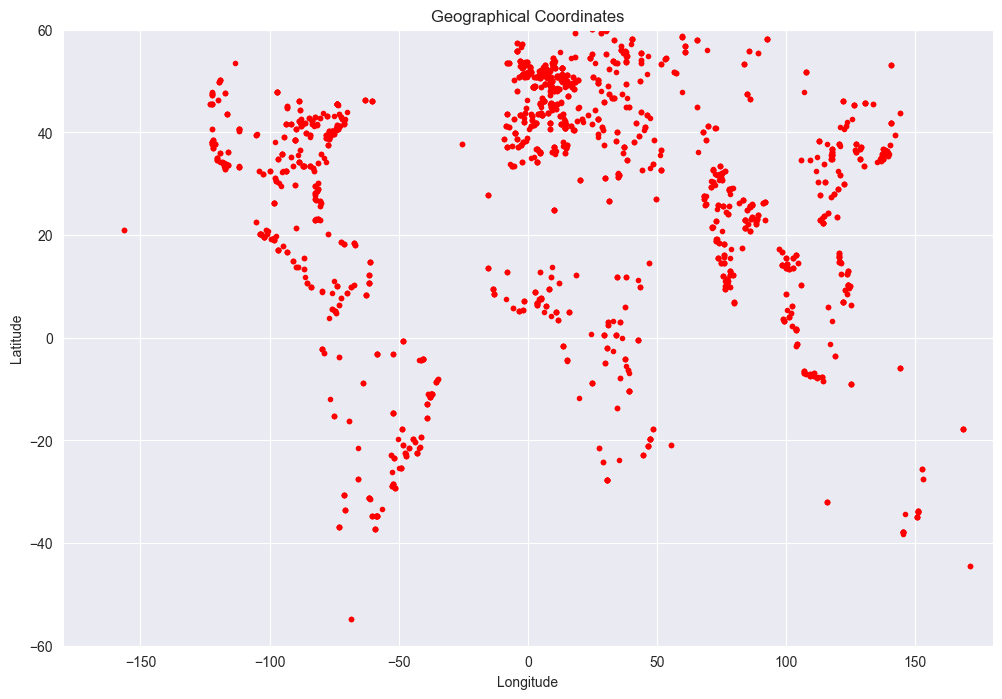

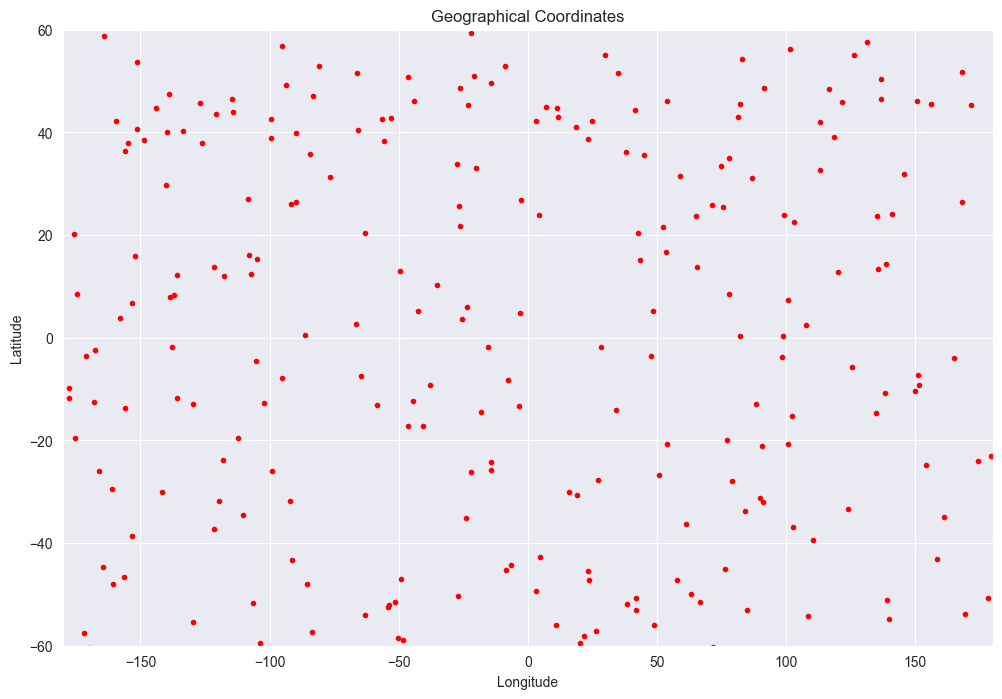

In [102]:
def plot_points(df):
    plt.figure(figsize=(12, 8))

    plt.scatter( df['longitude'], df['latitude'], marker='.', color='red')

    plt.title('Geographical Coordinates')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.xlim(-180, 180)
    plt.ylim(-60, 60)

    plt.grid(True)
    plt.show()

plot_points(df_devices)
plot_points(df_profiles)